In [1]:
from random import choices,randrange
import string
import numpy as np
from timeit import default_timer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle as pkl

# Given Functions

In [2]:
#Brute Force
def find_brute(T, P):
    n, m = len(T), len(P)
    
    # every starting position
    for i in range(n-m+1):
        k = 0
        
        # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            k += 1
            
        if k == m:
            return i
    return -1

#Boyer Moore
def find_boyer_moore(T, P):
    """
    Boyer-moore string matching algorithm returns
    the first index of the matching substring P in string T.
    """
    n, m = len(T), len(P)
    if m == 0:
        return 0
    #key is letter, value is index. Reading from the end. So last letter will have index 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    #i is for text, reading from the end of pattern.
    i = m-1
    #k is for the pattern, reading from the end of pattern.
    k = m-1
    
    count = 0
    
    while i < n:
        # If match, decrease i,k
        if T[i] == P[k]:
            if k == 0:
                return i
            else:
                i -= 1
                k -= 1
        # Not match , reset the positions
        else:
            #check if the element in the text which didn't match the pattern is elsewhere in the pattern. Get that position
            j = last.get(T[i], -1)
            #shift the entire pattern if j = -1 or shift until the matching character in the text.
            i += m - min(k, j+1)
            #k reset to end of pattern.
            k = m-1
    return -1

#Knuth Morris
def find_kmp(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    # print(fail)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                return j-m+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return -1

def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return fail

# Q1

## 1.1 Come up with D and P which is $\Omega$(dp)

Let text D be 'xxxxy' -> length, d = 5
Let pattern P be 'y' -> length, p = 1

This, using brute force, in the best case time complexity $\Omega$, will required 5 comparisons, i.e. $\Omega(dp)$

## 1.2 Modify Brute Force, Boyer Moore, KMP to find number of non overlapping sequences

In [3]:
def non_overlap_brute_force(T,P):
    n, m = len(T), len(P)
    i = 0 
    counter = 0 
    while i < n-m+1:
        k = 0
        # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            k += 1
        if k == m: #it is a complete match
            counter += 1
            i = i + m # shift text index by length of pattern
        else:
            i += 1

    return counter

def non_overlap_boyer_moore(T,P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    #key is letter, value is index. Reading from the end. So last letter will have index 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    #i is for text, reading from the end of pattern.
    i = m-1
    #k is for the pattern, reading from the end of pattern.
    k = m-1
    
    counter = 0
    
    while i < n:
        # If match, decrease i,k
        if T[i] == P[k]:
            #pattern found
            if k == 0:
                counter += 1
                 # move the text index forward to begin next set of comparisions with text,
                 # such that none of these comparisions overlap with the previous set of comparisions, 
                 # therefore 2m spaces.
                i = i + (2*m) - 1
                k = m-1
            else:
                i -= 1
                k -= 1
        # Not match , reset the positions
        else:
            #check if the element in the text which didn't match the pattern is elsewhere in the pattern. Get that position
            j = last.get(T[i], -1)
            #shift the entire pattern if j = -1 or shift until the matching character in the text.
            i += m - min(k, j+1)
            #k reset to end of pattern.
            k = m-1
    return counter

def non_overlap_kmp(T, P):
    n, m = len(T), len(P)
    counter = 0
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            #pattern found
            if k == m-1:
                j += 1 #increase text index by one so that the comparison begins from the next non overlapping character.
                k = 0 #reset pattern index
                counter += 1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return counter



In [4]:
# Proof at all of them work

T = "casfasccsqhfpsdcfdccccc"
P = "cc"

print("Does modified brute force work?", non_overlap_brute_force(T, P) == T.count(P))
print("Does modified boyer moore work?", non_overlap_boyer_moore(T, P) == T.count(P))
print("Does modified non overlap kmp work?", non_overlap_kmp(T, P) == T.count(P))


Does modified brute force work? True
Does modified boyer moore work? True
Does modified non overlap kmp work? True


## Experimental Analysis of the algorithms to find count of overlapping sequences
## Boyer Moore is the best. KMP and Brute force are comparable in the time taken thought KMP is slightly better


An average of 10 runs is taken for each size of pattern and text

In [5]:
def generate_text(letters,size):
    return ''.join(choices(letters,k=size))

def get_pattern(text,desired_length):
    return get_random_str(text,desired_length)

def get_random_str(text, required_pattern_length):
    idx = randrange(0, len(text) - required_pattern_length + 1)    # Randomly select an "idx" between 0 and len(T)-len(P)+1
    return text[idx : (idx+required_pattern_length)]

p_size = []
t_size = [] 
bf = []
bm = []
kmp = []
e = []
for P_size in [1,10,100]:
    for T_size in [10**i for i in range(1,7) if 10**i>=P_size]:
        print("(p_size,t_size):", P_size,T_size)
        for ensemble in range(10):
            e.append(ensemble)
            p_size.append(P_size)
            t_size.append(T_size)
            T = generate_text(list(string.ascii_lowercase),T_size)
            P = get_pattern(T,10)

            #sanity check to see if it is as expected
            if non_overlap_brute_force(T, P) == T.count(P):
                pass
            else:
                print("bug! in non_overlap_brute_force")
            if non_overlap_boyer_moore(T, P) == T.count(P):
                pass
            else:
                print("bug! in non_overlap_boyer_moore")
            if non_overlap_kmp(T, P) == T.count(P):
                pass
            else:
                print("bug! in non_overlap_kmp")

            start = default_timer()
            _ = non_overlap_brute_force(T, P)
            bf.append(default_timer()-start)

            start = default_timer()
            _ = non_overlap_boyer_moore(T, P)
            bm.append(default_timer()-start)

            start = default_timer()
            _ = non_overlap_kmp(T, P)
            kmp.append(default_timer()-start)

df = pd.DataFrame()
df['p_size'] = p_size
df['t_size'] = t_size
df['bf_time'] = bf
df['bm_time'] = bm
df['kmp_time'] = kmp
df['ensemble'] = e

with open("non_overlap_running_times.pkl",'wb') as f:
    pkl.dump(df,f)


(p_size,t_size): 1 10
(p_size,t_size): 1 100
(p_size,t_size): 1 1000
(p_size,t_size): 1 10000
(p_size,t_size): 1 100000
(p_size,t_size): 1 1000000
(p_size,t_size): 10 10
(p_size,t_size): 10 100
(p_size,t_size): 10 1000
(p_size,t_size): 10 10000
(p_size,t_size): 10 100000
(p_size,t_size): 10 1000000
(p_size,t_size): 100 100
(p_size,t_size): 100 1000
(p_size,t_size): 100 10000
(p_size,t_size): 100 100000
(p_size,t_size): 100 1000000


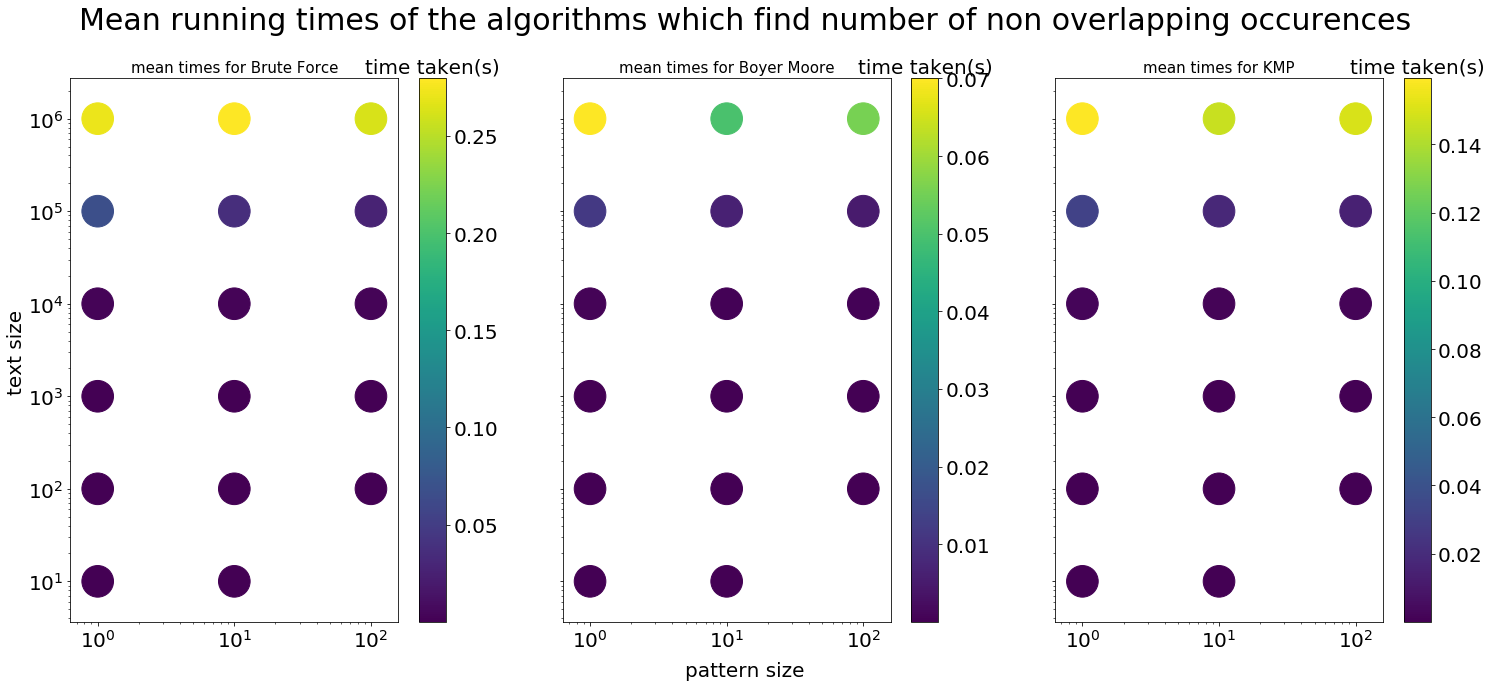

In [6]:
d = df.groupby(['p_size','t_size']).mean().reset_index()

fig,axs = plt.subplots(1,3,figsize=(25,10),sharex=True,sharey=True)
fig.text(0.5, 0.05, 'pattern size',size=20, ha='center')
fig.text(0.09, 0.5, 'text size',size = 20, va='center', rotation='vertical')
fig.suptitle("Mean running times of the algorithms which find number of non overlapping occurences",size=30)
axs = axs.flatten()
list_name = ['Brute Force', 'Boyer Moore','KMP']
lists = [d.bf_time, d.bm_time, d.kmp_time]

for i in range(3):
    f = axs[i].scatter(d.p_size,d.t_size,c=lists[i],s=1000)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_title(f'mean times for {list_name[i]}',size=15)
    # axs[i].set_xlabel('pattern size',size=20)
    # axs[i].set_ylabel('text size',size=20)
    axs[i].tick_params(axis='x', labelsize=20)
    axs[i].tick_params(axis='y', labelsize=20 )
    cbar = plt.colorbar(f,ax=axs[i])
    cbar.ax.tick_params(labelsize=20) 
    cbar.ax.set_title('time taken(s)',fontsize=20)

# Q2 

## Experimental Analysis of 
- ## number of character comparisions of the algorithms - Boyer moore takes the least amount of character comparisons by KMP and Brute force.  
    ### However, I feel KMP will be much better when functioning on english words or realistic words rather than just random strings. I feel so because KMP, implicitly, exploits prefix-suffix structure which will be present in real words but not in random strings.  
   
    
- ## running times of the original algorithms - Boyer moore takes the least amount of time followed by KMP and Brute force

An average of 10 runs is taken for each size of pattern and text

In [7]:
#Modified functions for character comparisons

#Brute Force
def cc_find_brute(T, P):
    n, m = len(T), len(P)

    charac_counter = 0 
    # every starting position
    for i in range(n-m+1):
        k = 0
        
        # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            charac_counter += 1 #successful character comparision
            k += 1
        # while k < m:
        #     if  T[i+k] == P[k]:
        #         charac_counter += 1 #successful character comparision
        #         k += 1
        #     else:
        #         charac_counter += 1 #failed character comparision
        #         k += 1
        if T[i+k-1] != P[k-1]:
            charac_counter += 1 #broke while loop because of second part of the logical and of the while loop
        if k == m:
            return charac_counter
    return charac_counter

#Boyer Moore
def cc_find_boyer_moore(T, P):
    """
    Boyer-moore string matching algorithm returns
    the first index of the matching substring P in string T.
    """
    n, m = len(T), len(P)
    if m == 0:
        return 0
    #key is letter, value is index. Reading from the end. So last letter will have index 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    #i is for text, reading from the end of pattern.
    i = m-1
    #k is for the pattern, reading from the end of pattern.
    k = m-1
    
    charac_counter = 0
    
    while i < n:
        # If match, decrease i,k
        if T[i] == P[k]:
            charac_counter += 1
            if k == 0:
                return charac_counter
            else:
                i -= 1
                k -= 1
        # Not match , reset the positions
        else:
            charac_counter += 1 #failed character comparision
            #check if the element in the text which didn't match the pattern is elsewhere in the pattern. Get that position
            j = last.get(T[i], -1)
            #shift the entire pattern if j = -1 or shift until the matching character in the text.
            i += m - min(k, j+1)
            #k reset to end of pattern.
            k = m-1
    return charac_counter

#Knuth Morris
def cc_find_kmp(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    # print(fail)
    j = 0
    k = 0
    charac_counter = 0
    while j < n:
        if T[j] == P[k]:
            charac_counter += 1 #successfull character comparison
            if k == m-1:
                return charac_counter
            j += 1
            k += 1
        elif k > 0:
            charac_counter += 1 #failed character comparision
            k = fail[k-1]
        else:
            charac_counter += 1 #failed character comparision
            j += 1
    return charac_counter

In [8]:
def generate_text(letters,size):
    return ''.join(choices(letters,k=size))

def get_pattern(text,desired_length):
    return get_random_str(text,desired_length)

def get_random_str(text, required_pattern_length):
    idx = randrange(0, len(text) - required_pattern_length + 1)    # Randomly select an "idx" between 0 and len(T)-len(P)+1
    return text[idx : (idx+required_pattern_length)]

p_size = []
t_size = [] 
bf = []
bm = []
kmp = []
e = []
for P_size in [1,10,100]:
    for T_size in [10**i for i in range(1,5) if 10**i>=P_size]:
        print("(p_size,t_size):", P_size,T_size)
        for ensemble in range(10):
            e.append(ensemble)
            p_size.append(P_size)
            t_size.append(T_size)
            T = generate_text(list(string.ascii_lowercase),T_size)
            P = get_pattern(T,10)

            #get number of character comparisions
            cc = cc_find_brute(T, P)
            bf.append(cc)

            #get number of character comparisions
            cc = cc_find_boyer_moore(T, P)
            bm.append(cc)
            
            #get number of character comparisions
            cc = cc_find_kmp(T, P)
            kmp.append(cc)

df = pd.DataFrame()
df['p_size'] = p_size
df['t_size'] = t_size
df['bf_time'] = bf
df['bm_time'] = bm
df['kmp_time'] = kmp
df['ensemble'] = e

with open("character_comparisons.pkl",'wb') as f:
    pkl.dump(df,f)

(p_size,t_size): 1 10
(p_size,t_size): 1 100
(p_size,t_size): 1 1000
(p_size,t_size): 1 10000
(p_size,t_size): 10 10
(p_size,t_size): 10 100
(p_size,t_size): 10 1000
(p_size,t_size): 10 10000
(p_size,t_size): 100 100
(p_size,t_size): 100 1000
(p_size,t_size): 100 10000


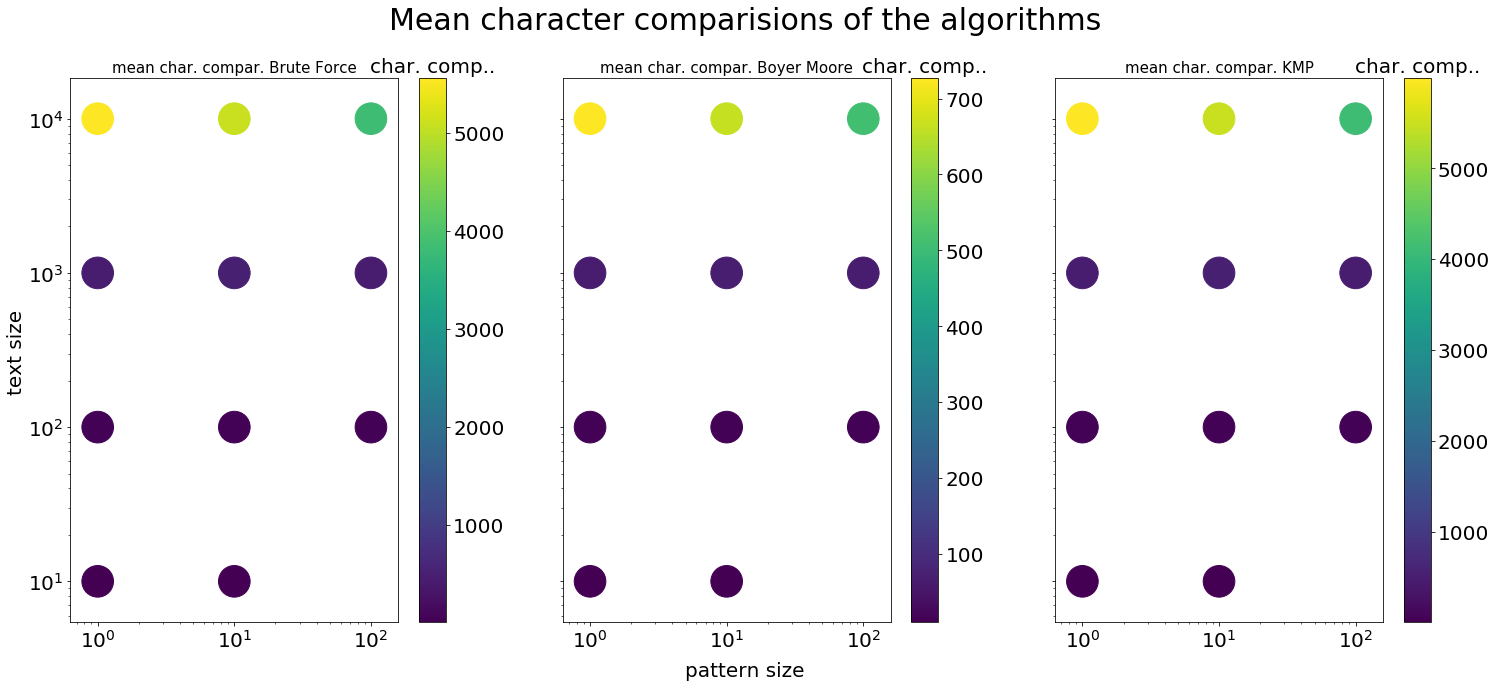

In [9]:
d = df.groupby(['p_size','t_size']).mean().reset_index()

fig,axs = plt.subplots(1,3,figsize=(25,10),sharex=True,sharey=True)
fig.text(0.5, 0.05, 'pattern size',size=20, ha='center')
fig.text(0.09, 0.5, 'text size',size = 20, va='center', rotation='vertical')
fig.suptitle("Mean character comparisions of the algorithms",size=30)
axs = axs.flatten()
list_name = ['Brute Force', 'Boyer Moore','KMP']
lists = [d.bf_time, d.bm_time, d.kmp_time]

for i in range(3):
    f = axs[i].scatter(d.p_size,d.t_size,c=lists[i],s=1000)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_title(f'mean char. compar. {list_name[i]}',size=15)
    # axs[i].set_xlabel('pattern size',size=20)
    # axs[i].set_ylabel('text size',size=20)
    axs[i].tick_params(axis='x', labelsize=20)
    axs[i].tick_params(axis='y', labelsize=20 )
    cbar = plt.colorbar(f,ax=axs[i])
    cbar.ax.tick_params(labelsize=20) 
    cbar.ax.set_title('char. comp..',fontsize=20)

In [10]:
def generate_text(letters,size):
    return ''.join(choices(letters,k=size))

def get_pattern(text,desired_length):
    return get_random_str(text,desired_length)

def get_random_str(text, required_pattern_length):
    idx = randrange(0, len(text) - required_pattern_length + 1)    # Randomly select an "idx" between 0 and len(T)-len(P)+1
    return text[idx : (idx+required_pattern_length)]

p_size = []
t_size = [] 
bf = []
bm = []
kmp = []
e = []
for P_size in [1,10,100]:
    for T_size in [10**i for i in range(1,6) if 10**i>=P_size]:
        print("(p_size,t_size):", P_size,T_size)
        for ensemble in range(10):
            e.append(ensemble)
            p_size.append(P_size)
            t_size.append(T_size)
            T = generate_text(list(string.ascii_lowercase),T_size)
            P = get_pattern(T,10)

            start = default_timer()
            _ = non_overlap_brute_force(T, P)
            bf.append(default_timer()-start)

            start = default_timer()
            _ = non_overlap_boyer_moore(T, P)
            bm.append(default_timer()-start)

            start = default_timer()
            _ = non_overlap_kmp(T, P)
            kmp.append(default_timer()-start)

df = pd.DataFrame()
df['p_size'] = p_size
df['t_size'] = t_size
df['bf_time'] = bf
df['bm_time'] = bm
df['kmp_time'] = kmp
df['ensemble'] = e

with open("running_times.pkl",'wb') as f:
    pkl.dump(df,f)

(p_size,t_size): 1 10
(p_size,t_size): 1 100
(p_size,t_size): 1 1000
(p_size,t_size): 1 10000
(p_size,t_size): 1 100000
(p_size,t_size): 10 10
(p_size,t_size): 10 100
(p_size,t_size): 10 1000
(p_size,t_size): 10 10000
(p_size,t_size): 10 100000
(p_size,t_size): 100 100
(p_size,t_size): 100 1000
(p_size,t_size): 100 10000
(p_size,t_size): 100 100000


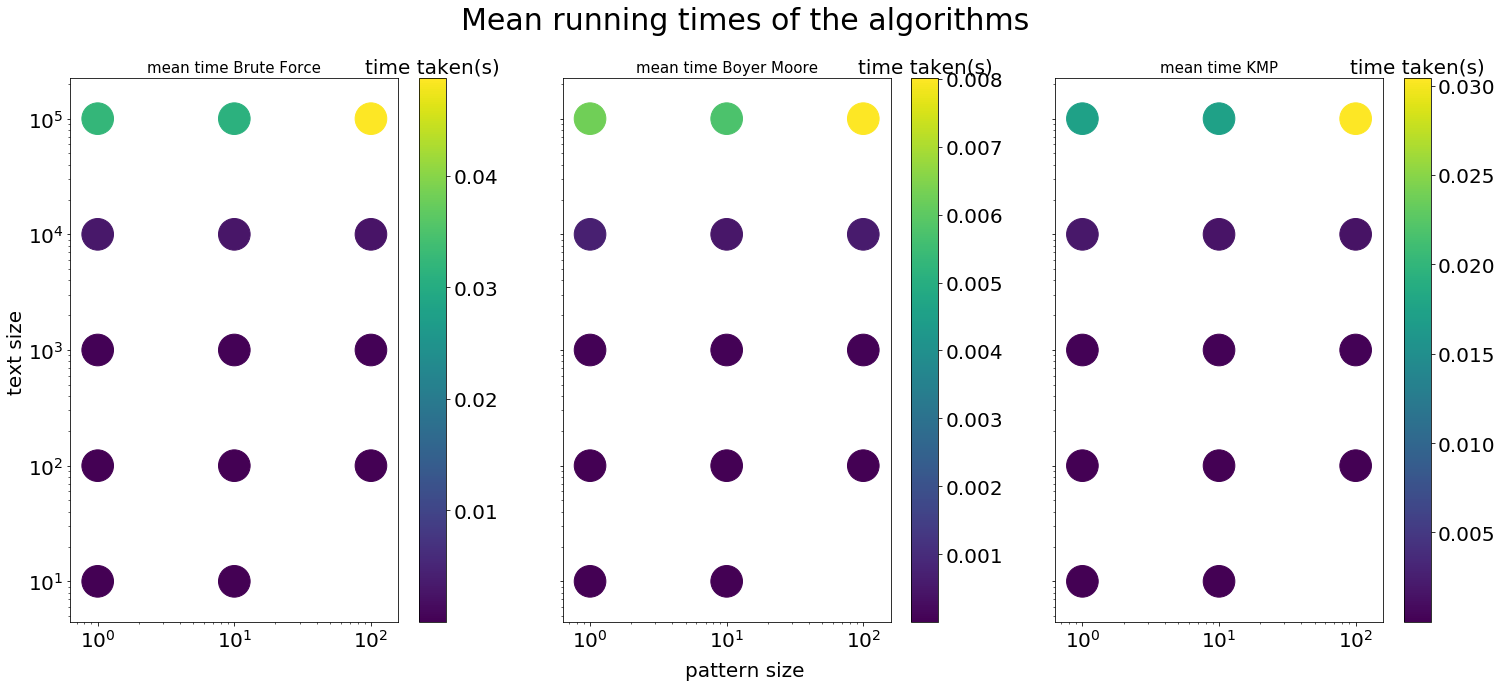

In [11]:
d = df.groupby(['p_size','t_size']).mean().reset_index()

fig,axs = plt.subplots(1,3,figsize=(25,10),sharex=True,sharey=True)
fig.text(0.5, 0.05, 'pattern size',size=20, ha='center')
fig.text(0.09, 0.5, 'text size',size = 20, va='center', rotation='vertical')
fig.suptitle("Mean running times of the algorithms",size=30)
axs = axs.flatten()
list_name = ['Brute Force', 'Boyer Moore','KMP']
lists = [d.bf_time, d.bm_time, d.kmp_time]

for i in range(3):
    f = axs[i].scatter(d.p_size,d.t_size,c=lists[i],s=1000)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_title(f'mean time {list_name[i]}',size=15)
    # axs[i].set_xlabel('pattern size',size=20)
    # axs[i].set_ylabel('text size',size=20)
    axs[i].tick_params(axis='x', labelsize=20)
    axs[i].tick_params(axis='y', labelsize=20 )
    cbar = plt.colorbar(f,ax=axs[i])
    cbar.ax.tick_params(labelsize=20) 
    cbar.ax.set_title('time taken(s)',fontsize=20)

# Q3 - Optimal paranthesization of matrix multiplication

In [12]:
#implemented the pseudocode for brute force matrix multiplication from text book
def matrix_multiply(A,B):
    if len(A[0]) != len(B):
        print("incompatible dimensions")
    else:
        C = [[None]*len(B[0]) for _ in range(len(A))]
        for i in range(len(A)):
            for j in range(len(B[0])):
                C[i][j] = 0
                for k in range(len(A[0])):
                    C[i][j] = C[i][j] + (A[i][k]*B[k][j])
    return C

In [13]:
ar,ac = 4,6
br,bc = 6,4
cr,cc = 4,6
a = [[random.sample(range(10),1)[0] for __ in range(ac)] for _ in range(ar)]
b = [[random.sample(range(10),1)[0] for __ in range(bc)] for _ in range(br)]
c = [[random.sample(range(10),1)[0] for __ in range(cc)] for _ in range(cr)]
    
result = matrix_multiply(a,b)
result = np.asarray(matrix_multiply(result,c))
exp_result = np.asarray(a) @ np.asarray(b) @ np.asarray(c)
print("is matrix multiplication result as expected?", np.all(result==exp_result))

is matrix multiplication result as expected? True


In [14]:
#given an s table and the start matrix number (i) and end matrix number(j), print the optimal parenthesization
#implementation of the pseudocode from the text book with a few comments
def print_optimal_parens(s,i,j):
    if i == j:
        print (" A"+str(i)+" ",end='')
    else:
        print ("(",end='')
        print_optimal_parens(s,i,s[i-1][j-2])
        print_optimal_parens(s,s[i-1][j-2]+1,j)
        print(")",end='')

##  Brute Force

In [15]:
# p is a list of length n+1 where the dimensions of matrix i are given by p[i-1]xp[i]. This ensures compatibility
p = [30,35,15,5,10,20,25]
n = len(p) - 1
s = [[None]*(n-1) for _ in range(n-1)]

def brute_force_mm(p,i,j):
	if i == j:
		return 0
	min_number_of_mults = np.inf

	for k in range(i, j):
		#get number of scalar multiplications if the paranthesis is placed at k. 
		#this does not use previously computed values (hence NOT dynamic programming)
		number_of_mults = brute_force_mm(p,i,k)+ brute_force_mm(p,k+1,j)+ (p[i-1]*p[k]*p[j])
		if number_of_mults < min_number_of_mults:
			min_number_of_mults = number_of_mults
			s[i-1][j-2] = k
	return min_number_of_mults

print("Brute force, number of scalar multiplications in optimal parenthesization",brute_force_mm(p,1,6))
print_optimal_parens(s,1,6)

Brute force, number of scalar multiplications in optimal parenthesization 15125
(( A1 ( A2  A3 ))(( A4  A5 ) A6 ))

## Dynamic Programming

In [16]:
def matrix_chain_order(p):
    n = len(p) - 1
    m = [[None]*n for _ in range(n)]
    s = [[None]*(n-1) for _ in range(n-1)]
    for i in range(n):
        m[i][i] = 0 #one matrix with itself! 
    for l in range(2,n+1): #length of the chain 
        # each run of the i,j loop fills one row of the m table in the bottom up fashion.
        # the table is structured as shown in fig 15.5
        for i in range(0, n-l+1):
            # print("i",i)
            j = i + l - 1
            # print("i,j",i,j)
            m[i][j] = np.inf
            for k in range(i,j):
                # print(i,j,k)
                #the part where solution of the subproblem is used (equation 15.7)
                q = m[i][k] + m[k+1][j] + p[i]*p[k+1]*p[j+1]
                if q < m[i][j]:
                    #update m[i][j] which was infinity initally
                    # print(i,j,k,q)
                    m[i][j] = q
                    #fill s 
                    s[i][j-1] = k+1
    return m,s 

In [17]:
p = [30,35,15,5,10,20,25]
m,s = matrix_chain_order(p)

print("Dynamic programming, number of scalar multiplications in optimal parenthesization = ",m[0][5])
print_optimal_parens(s,1,6)

Dynamic programming, number of scalar multiplications in optimal parenthesization =  15125
(( A1 ( A2  A3 ))(( A4  A5 ) A6 ))

In [18]:
#m table
m

[[0, 15750, 7875, 9375, 11875, 15125],
 [None, 0, 2625, 4375, 7125, 10500],
 [None, None, 0, 750, 2500, 5375],
 [None, None, None, 0, 1000, 3500],
 [None, None, None, None, 0, 5000],
 [None, None, None, None, None, 0]]

In [19]:
#s table
s

[[1, 1, 3, 3, 3],
 [None, 2, 3, 3, 3],
 [None, None, 3, 3, 3],
 [None, None, None, 4, 5],
 [None, None, None, None, 5]]

# Memoization

In [20]:
def matrix_chain_order_memoization(p):
    n = len(p) - 1
    m = [[None]*n for _ in range(n)]
    s = [[None]*(n-1) for _ in range(n-1)]

    cache = {} #the memoization bit. Storing already calculated values
    for i in range(n):
        m[i][i] = 0 #one matrix with itself! 
    for l in range(2,n+1): #length of the chain 
        # each run of the i,j loop fills one row of the m table in the bottom up fashion.
        # the table is structured as shown in fig 15.5
        for i in range(0, n-l+1):
            # print("i",i)
            j = i + l - 1
            # print("i,j",i,j)
            m[i][j] = np.inf
            for k in range(i,j):
                # print(i,j,k)
                #the part where solution of the subproblem is used (equation 15.7)

                # If i,j,k is present in cache then use that instead of recalculating it. Acts like a lookup table
                if (i,j,k) in cache:
                    m[i][j] = cache[(i,j,k)]
                    s[i][j-1] = k+1
                    continue

                #if not present in cache
                q = m[i][k] + m[k+1][j] + p[i]*p[k+1]*p[j+1]
                if q < m[i][j]:
                    #update m[i][j] which was infinity initally
                    # print(i,j,k,q)
                    m[i][j] = q
                    #fill s 
                    s[i][j-1] = k+1
                    cache[(i,j,k)] = q

    return m,s 

In [21]:
p = [30,35,15,5,10,20,25]
m,s = matrix_chain_order_memoization(p)

print("Dynamic programming with memoization, number of scalar multiplications in optimal parenthesization = ",m[0][5])
print_optimal_parens(s,1,6)

Dynamic programming with memoization, number of scalar multiplications in optimal parenthesization =  15125
(( A1 ( A2  A3 ))(( A4  A5 ) A6 ))

# Q4

In [22]:
#idea is to recursively solve sub (optimisation) problems.
#implementation of the pseudocode from the textbook with a few comments
def lcs_tables(X,Y):
    m = len(X)
    n = len(Y)

    #list of lists as B and C tables

    # Initialize tables
    c = [[0]*(n+1) for x in range(m+1)]
    b = [[None]*(n) for x in range(m)]
    # print(len(c),len(c[0]),m,n)
    # print(len(b),len(b[0]),m,n)

    for i in range(1,m+1):
        c[i][0] = 0
    for j in range(0,n+1):
        c[0][j] = 0
    for i in range(1,m+1):
        for j in range(1,n+1):
            if X[i-1] == Y[j-1]:
                c[i][j] = c[i-1][j-1] + 1
                b[i-1][j-1] = "UL"
            elif c[i-1][j] >= c[i][j-1]:
                c[i][j] = c[i-1][j]
                b[i-1][j-1] = "U"
            else:
                c[i][j] = c[i][j-1]
                b[i-1][j-1] = "L"
    return c,b


def construct_lcs(b,X,i,j,output_list):
    if (i == -1) or (j == -1):
        return
    if b[i][j] == 'UL':
        construct_lcs(b,X,i-1,j-1,lcs)
        lcs.append(X[i])
    elif b[i][j] == 'U':
        construct_lcs(b,X,i-1,j,lcs)
    else:
        construct_lcs(b,X,i,j-1,lcs)


#checking with the example given in the textbook, fig 15.8
X = 'abcbdab'
Y = 'bdcaba'
c,b = lcs_tables(X,Y)
lcs = []
construct_lcs(b,X,len(X)-1,len(Y)-1,lcs)
print(lcs)

['b', 'c', 'b', 'a']


In [23]:
#c and b tables
c,b

([[0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 1, 1],
  [0, 1, 1, 1, 1, 2, 2],
  [0, 1, 1, 2, 2, 2, 2],
  [0, 1, 1, 2, 2, 3, 3],
  [0, 1, 2, 2, 2, 3, 3],
  [0, 1, 2, 2, 3, 3, 4],
  [0, 1, 2, 2, 3, 4, 4]],
 [['U', 'U', 'U', 'UL', 'L', 'UL'],
  ['UL', 'L', 'L', 'U', 'UL', 'L'],
  ['U', 'U', 'UL', 'L', 'U', 'U'],
  ['UL', 'U', 'U', 'U', 'UL', 'L'],
  ['U', 'UL', 'U', 'U', 'U', 'U'],
  ['U', 'U', 'U', 'UL', 'U', 'UL'],
  ['UL', 'U', 'U', 'U', 'UL', 'U']])

### Application on real world data obtained from [here](https://www.ncbi.nlm.nih.gov/protein/)

In [24]:
coronin = \
"MAWRFKASKYKNAAPIVPKAEACVREICVGSYQTYGNNIAASGAFMAFNWEHTGSSVAVLPLDDCGRKSK\
TMPLLHGHTDTVTDLKFSPFHDGLLATASQDCLVKIWHIPEKGLEQSLSDPEAIFSHKQRRVETVGFHPT\
ADGLMYSTAAGCVALFDLSTQKEIFSNNEHPEVIQSASWREDGSVLATSCKDKNVRIFDPRAAGSPIQLT\
AESHQSIKDSRVVWLGNQHRILTTGFDAARLRQVIIRDVRNFNTPEKTLELDCSTGILMPLFDPDTNMLF\
LAGKGDTTINYLEITDKDPYLIEGLRHTGEQTKGACLVPKRALKVMEAEVNRVLQLTSNMVIPIMYQVPR\
KTYRDFHADLYPETTGYKTELVAGEWLNGSNQAVPKMSLDPAKREHGDEPIIIHRGNLSDFVKNLENQRA\
KSNTTGKPNQQAKRNDNEHFVMLNTGNNFEEKNGNDNSNESNGKKSTPSQSQPDGECSELIRKFEAKYKV\
DSEKEKAHAYAQSHEDDKESPTEHEHSTGSSEEVSSSGGLDNHSASGSHSPPKPMPRTSRSNSLPEASDS\
AGESSSTNTPRPRPRTTAASAYKPRLGPKPFSSTTGDVSFDKVFAVPLAPGSHENISNVGQDSGVEMTPA\
QGAKPDLIVEIEIKKKHEREPAVSGNGVQKSLTTSERRKSSADDDESSDKIFEQNSESSENSTEGEDRTD\
ADLRRNCTSRSSFAERRRIYENRSKSQVDEKPQSPVPLRREHSKVEPLKPNQQQQQQGNVIDTKRISVPE\
GKLMEEHRRGNGAGLKKSATEAAFSAASTKRTSTVFGKVSKFRHLKGTPGHKSTHIENLRNLSRQIPGEC\
NGFHANQERVAVPLSGPGGKIAIFELSRPGRLPDGVIPSLVNGSNIMDFQWDPFDAQRLAVACDDGIVKI\
WHIEAGGLSEPTNTPAGELTAHLDKIYFIRFHPLAADVLLTASYDMTIKLWDLRTMTEKCSLSGHTDQIF\
DFAWSPCGRLGATVCKDGKIRVYNPRKSETPIREGNGPVGTRGARITWALEGHYIVCTGFDKVSERQISV\
YNAQKLSAPLNTASLDVSPSILIPFYDEDSSTLFVTGKGDSTIYCYEITDEEPYICPLSHHRCTSLHQGL\
SFLTKNHCDVASVEFSKAYRLTNTTIEPLSFTVPRIKSELFQDDLFPPTRITWSATLSSEDWFASNDKAA\
PKVSLKPEGMETLSSIQQVPAQPVKKPDHPQFGGQKSEYEINKQQEIQKSVSARMEFTTKLEQDDMEGVD\
ENEWQE"


dystrophin = \
"SGEQWKRLQISLQDFLTWMNLKNDELRRQMPIGGDAPTVCQQNDVHRIFKRELKAKEPVVMSALDTVHLF\
LADPAIRAPESLLTGPREKIPEENIQNVAKRIRKYAEEVKVEWDKLSNRSVDWQKRIDEALKRLLELQDS\
MDELNLKLRQAEAIKDTWQPVGDLLIDSLQDHIEKVKVFRAEIAPMKENVTHMNDLASQFTPPDIQLSPY\
NLNQLEDLNTRWKLLQVSIDELLKQLHEAHRDFGPTSQHFLSTSVQGPWERAISPNKVPYYINHQTQTTC\
WDHPKMTELYQSLADLNNVRFSAYRTAMKLRRLQKALCLDLLSLPSACEAFDQHNLKQNDQLLDILEIIN\
CLTSIYDRLEQEHSNLVNVPLCVDMCLNWLLNVYDTGRTGKIRVLSFKSGIMSMCKAHLEDKYRYLFKQV\
ASPTGFCDQRRLGLLLHEAIQIPRQLGEVASFGGSNIEPSVRSCFQFANNKPEIEAALFLDWMRLEPQSL\
VWMPVLHRVAAAETAKHQAKCNICKECPIIGFRYRSLKHFNYDVCQSCFFSGRTAKGHKMHYPMVEYCTP\
TTSGEDVRDFAKVLKNKFRTKRYFAKHPRMGYLPVQTVLEGDNLETPVTLINFWPVDYEPASSPQLSHDD\
THSRIEHYLSRLAEMENRNGSYLNDSISPNESIDDEHLLIQHYCQSLNQESPLSQPRSPAQILISLESEE\
RGELERILADLEDENRNLQSEYEKLKQQHDHKGLSPLPSPPEMMPISPQSPRDAELIAEAKLLRQHKGRL\
EARMQILEDHNKQLESQLHRLRQLLEQPQAEVRVNGTSVSSPSTSSQRSDSSQPVLLHGVGSQTSGILGE\
DDLLSAPQSTSSELEDVMEQLSSSFPSSQRRDTPGKKMKEVPM"

c,b = lcs_tables(coronin,dystrophin)
lcs = []
construct_lcs(b,coronin,len(coronin)-1,len(dystrophin)-1,lcs)
print("LCS:",''.join(lcs))

#symmetric
# c,b = lcs_tables(dystrophin,coronin)
# lcs = []
# construct_lcs(b,dystrophin,len(dystrophin)-1,len(coronin)-1,lcs)
# print("LCS:",''.join(lcs))

LCS: WKRISQTNNELRMPGDTVQDVHIEKESLDTVFADAALLTKIEEIQVAKRIRAEKDSRVWQRIDARLLELDSMLNLLAEIKDPLILHEKVKRAEAEVNLQTPIQPYDLTKLLQVSLKEHGPHLSVERASNKPNQQDHMTEDNNSKKSPSQQDECSIYDEEHSDDTTGVSSGSAHLEDRYLKPTGFDLGHEIQPQGVASGGSSRSFQNNEEALFREPQSPVLRVEKQNIKIGRRLKSFSRTKGHKHPECGERAVLKFRPGLPVLGNIFWDPAQLDDHIELSENGLDIIHLLSLESLSQSPLISEERGRIALEDERQSYQKLSPLSSPSLIELKGIEDELHRLQLLAVRNTTPLSTIEDDLPSTSSEDVMELSSPQDPGKKMKEM
